In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import matplotlib.dates as mdates
import numpy as np

In [82]:
path = 'C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/DataSet Comparison/Barkhan'

In [83]:
#Average Monthly Data
Avg_M = pd.read_csv(path+'/Average_Monthly/AverageMonthlyData.csv')

In [84]:
# #Fixed ERA5 dataset
# ERA5_PPT = pd.read_csv(path+'/Daily/Kaha_era5_rain.csv')
# ERA5_PPT['date'] = pd.to_datetime(ERA5_PPT['date'])

In [85]:
#events greater than 40
events1 = pd.read_csv(path+'/Events/PMD.csv')
events1['date'] = pd.to_datetime(events1['date'])
events2 = pd.read_csv(path+'/Events/CHIRP.csv')
events2['date'] = pd.to_datetime(events2['date'])
events3 = pd.read_csv(path+'/Events/ERA5.csv')
events3['date'] = pd.to_datetime(events3['date'])

In [86]:
#yearly sum graph data
data = pd.read_csv(path+'/Daily/DATA_PMD_ERA5_CHIRP_Rain - Copy.csv')
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data.fillna(0)
yearly_sum = data.groupby('year')[['ERA5', 'PMD','CHIRP']].sum().reset_index()

In [87]:
#Cummulative sum
data['ERA5_Cummulative_rainfall(mm)'] = data['ERA5'].cumsum() #ERA5 Values have some issue in data file
data['PMD_Cummulative_rainfall(mm)'] = data['PMD'].cumsum()
data['CHIRPS_Cummulative_rainfall(mm)'] = data['CHIRP'].cumsum()

In [88]:
ma_window = 300
data['MA_ERA5'] = data['ERA5_Cummulative_rainfall(mm)'].rolling(window=ma_window).mean()
data['MA_PMD'] = data['PMD_Cummulative_rainfall(mm)'].rolling(window=ma_window).mean()
data['MA_CHIRPS'] = data['CHIRPS_Cummulative_rainfall(mm)'].rolling(window=ma_window).mean()

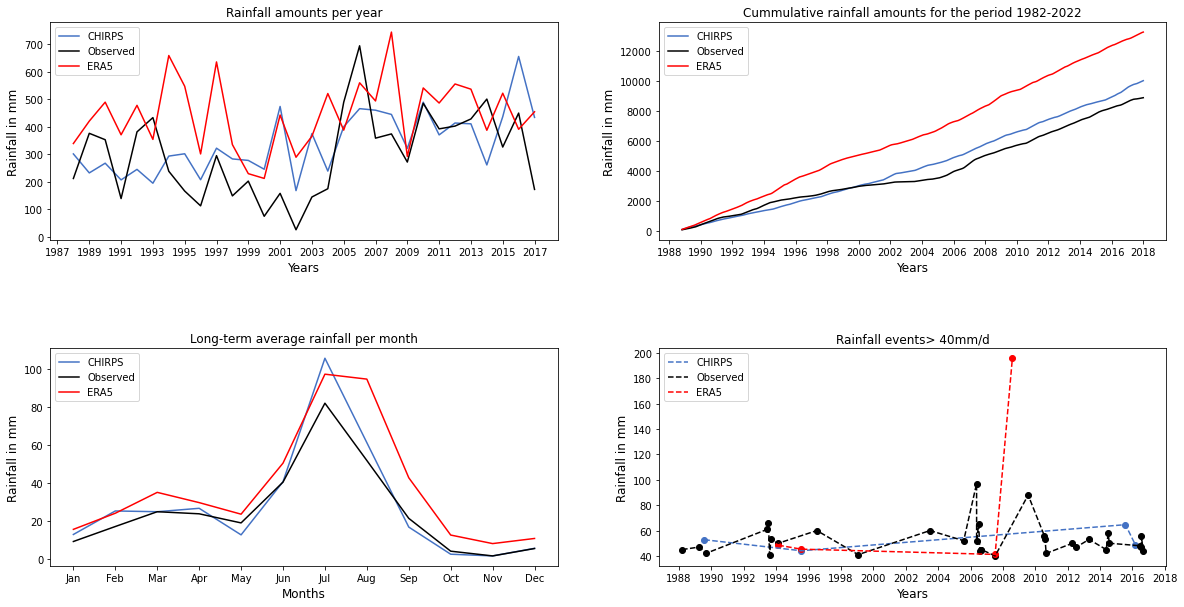

In [89]:
#Plot in subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

fig.subplots_adjust(hspace=0.5)

date_fmt = mdates.DateFormatter('%Y')

# set the x-axis ticker to only show years

axs[0,0].plot(yearly_sum['year'], yearly_sum['CHIRP'],color='#4472C4',label='CHIRPS')
axs[0,0].plot(yearly_sum['year'], yearly_sum['PMD'],color='black',label='Observed')
axs[0,0].plot(yearly_sum['year'], yearly_sum['ERA5'],color='#FF0000',label='ERA5')
axs[0,0].set_title('Rainfall amounts per year')
axs[0,0].set_ylabel('Rainfall in mm')
axs[0,0].set_xlabel('Years',fontsize='12')
axs[0,0].set_xticks(range(1987,2019, 2))
axs[0,0].set_ylabel('Rainfall in mm',fontsize='12')
axs[0,0].legend(loc='upper left')



axs[0,1].plot(data['date'], data['MA_CHIRPS'],color='#4472C4',label='CHIRPS')
axs[0,1].plot(data['date'], data['MA_PMD'],color='black',label='Observed')
axs[0,1].plot(data['date'], data['MA_ERA5'],color='#FF0000',label='ERA5')
axs[0,1].set_title('Cummulative rainfall amounts for the period 1982-2022')
axs[0,1].set_ylabel('Rainfall in mm',fontsize='12')
axs[0,1].set_xlabel('Years',fontsize='12')
axs[0,1].legend(loc='upper left')
axs[0,1].xaxis.set_major_formatter(date_fmt)
axs[0,1].xaxis.set_major_locator(mdates.YearLocator(2))



axs[1,0].plot(Avg_M['Month'], Avg_M['Precipitation (mm/mth) CHIRPS'],color='#4472C4',label='CHIRPS')
axs[1,0].plot(Avg_M['Month'], Avg_M['Precipitation (mm/mth) PMD'],color='black',label='Observed')
axs[1,0].plot(Avg_M['Month'], Avg_M['Precipitation (mm/mth) ERA5'],color='#FF0000',label='ERA5')
axs[1,0].set_title('Long-term average rainfall per month')
axs[1,0].set_ylabel('Rainfall in mm',fontsize='12')
axs[1,0].set_xlabel('Months',fontsize='12')
axs[1,0].legend(loc='upper left')

axs[1,1].scatter(events2['date'], events2['CHIRP_Source'], color='#4472C4', marker='o')
axs[1,1].plot(events2['date'], events2['CHIRP_Source'], linestyle='--',color='#4472C4',label='CHIRPS')
axs[1,1].scatter(events1['date'], events1['PMD'],color='black',marker='o')
axs[1,1].plot(events1['date'], events1['PMD'],linestyle='--', color='black',label='Observed')
axs[1,1].scatter(events3['date'], events3['ERA5'],color='#FF0000',marker='o')
axs[1,1].plot(events3['date'], events3['ERA5'],linestyle='--', color='#FF0000',label='ERA5')
axs[1,1].set_title('Rainfall events> 40mm/d')
axs[1,1].set_ylabel('Rainfall in mm',fontsize='12')
axs[1,1].set_xlabel('Years',fontsize='12')
axs[1,1].xaxis.set_major_formatter(date_fmt)
axs[1,1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1,1].legend(loc='upper left')



fig.savefig(path+'.png')